In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import xavierUtils as xu
import datetime as dt
%autosave 1000000

Autosaving every 1000000 seconds


In [3]:
pd.to_datetime('2019-02-01') + pd.to_timedelta(99, unit='d')

Timestamp('2019-05-11 00:00:00')

In [149]:
today = dt.datetime.now().strftime("%Y-%m-%d")
print today

2019-04-25


### Carregando dados

In [80]:
query = "SELECT * FROM `gabinete-compartilhado.camara_v2.deputados_orgaos`"

rorgaos = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

In [111]:
rorgaos['id_deputado'] = rorgaos.api_url.map(lambda s: int(s.split('/')[-2]))

In [43]:
query = "SELECT * FROM `gabinete-compartilhado.analise_congresso_poder.camara_cargos_score`"

rcargos = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

In [62]:
query = "SELECT * FROM `gabinete-compartilhado.analise_congresso_poder.camara_lideracas_score`"

rlider = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

In [ ]:
#rcargos = pd.read_csv('../dados/cargos/cargos_2019-04-17.csv')

### Exploração

#### Base Cargos

In [254]:
print xu.Bold('-- Cargos --')
xu.unique(rcargos.columns)

-- Cargos --
5:cargo | data_fim | data_inicio | id_deputado | score


In [255]:
rcargos.dtypes

data_inicio    datetime64[ns]
data_fim       datetime64[ns]
id_deputado             int64
cargo                  object
score                 float64
dtype: object

In [67]:
xu.checkMissing(rcargos)

Colunas com valores faltantes:
Empty DataFrame
Columns: [coluna, N, %]
Index: []


In [69]:
xu.mapUnique(rcargos)


data_inicio: 562 unique values.
(sample) 2001-03-20T00:00:00.000000000,  2001-03-28T00:00:00.000000000,  2001-04-03T00:00:00.000000000,  2001-11-19T00:00:00.000000000,  2005-11-29T00:00:00.000000000,  2009-12-08T00:00:00.000000000,  2011-06-09T00:00:00.000000000,  2013-03-20T00:00:00.000000000,  2014-04-10T00:00:00.000000000,  2014-04-22T00:00:00.000000000,  2015-03-10T00:00:00.000000000,  2015-03-23T00:00:00.000000000,  2015-09-22T00:00:00.000000000,  2015-11-24T00:00:00.000000000,  2016-02-16T00:00:00.000000000,  2016-05-02T00:00:00.000000000,  2016-05-03T00:00:00.000000000,  2016-06-20T00:00:00.000000000,  2017-11-09T00:00:00.000000000,  2019-04-15T00:00:00.000000000

data_fim: 584 unique values.
(sample) 1999-09-14T00:00:00.000000000,  2001-04-20T00:00:00.000000000,  2001-05-24T00:00:00.000000000,  2005-03-31T00:00:00.000000000,  2005-06-02T00:00:00.000000000,  2005-11-22T00:00:00.000000000,  2007-10-05T00:00:00.000000000,  2011-08-24T00:00:00.000000000,  2012-11-22T00:00:00.00000

#### Base Lideranças

In [256]:
print xu.Bold('-- Lideranças --')
xu.unique(rlider.columns)

-- Lideranças --
7:cargo | id_cargo | id_deputado | score | sigla_bloco | timestamp | total_membros


In [66]:
rlider.dtypes

timestamp        datetime64[ns]
id_deputado             float64
id_cargo                  int64
sigla_bloco              object
total_membros           float64
cargo                    object
score                   float64
dtype: object

In [68]:
xu.checkMissing(rlider)

Colunas com valores faltantes:
          coluna   N      %
1    id_deputado  15   2.67
4  total_membros  81  14.44


In [257]:
xu.mapUnique(rlider)


timestamp: 3 unique values.
2019-04-16T00:00:00.000000000,  2019-04-17T00:00:00.000000000,  2019-04-18T00:00:00.000000000

id_deputado: 181 unique values.
(sample) 73891.0,  74161.0,  74262.0,  74471.0,  151208.0,  160665.0,  164359.0,  178832.0,  178854.0,  178930.0,  178959.0,  204423.0,  204441.0,  204447.0,  204449.0,  204472.0,  204520.0,  204546.0,  204556.0,  204558.0

id_cargo: 3 unique values.
2,  3,  4

sigla_bloco: 33 unique values.
(sample) Bloco PDT, AVANTE,  Bloco PP, MDB, PTB,  CIDADANIA,  DEM,  Governo,  MDB,  Maioria,  NOVO,  Oposição,  PATRI,  PDT,  PMN,  PODE,  PP,  PR,  PRB,  PROS,  PSC,  PSD,  PT

total_membros: 22 unique values.
(sample) 3.0,  6.0,  12.0,  21.0,  24.0,  30.0,  33.0,  42.0,  81.0,  84.0,  90.0,  93.0,  96.0,  105.0,  108.0,  114.0,  162.0,  165.0,  252.0,  nan

cargo: 3 unique values.
Lider Governo Camara,  Lider de Partido/Bloco,  Vice Lider

score: 3 unique values.
2.3,  3.6,  3.7


#### Base orgaos (bruta)

### Pesos dos cargos e lideranças

In [70]:
rcargos[['cargo','score']].drop_duplicates().sort_values('score',ascending=False)

,cargo,score
1364,"Presidencia Comissao Serie A - CCJC, CMO e CFT",3.5
0,Membro da Mesa,2.8
56,Presidente CPI,2.8
3456,"Presidencia Comissao Serie B - CE, CETASP, CIN...",2.6
64,Relator de Comissao Especial,2.5
717,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
698,Presidencia de Comissao Serie C - Resto,1.5
1374,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0
104,Membro de Comissao Serie C - Resto,0.3


In [71]:
rlider[['cargo','score']].drop_duplicates().sort_values('score',ascending=False)

,cargo,score
366,Lider Governo Camara,3.7
0,Lider de Partido/Bloco,3.6
3,Vice Lider,2.3


### Análise do número de cargos por deputado

In [259]:
# Função para selecionar cargos ativos num certo período:
def activeInPeriod(df, start, end):
    if np.any(df.columns.values=='data_inicio') and np.any(df.columns.values=='data_fim'):
        return df.loc[(df.data_fim>=start) & (df.data_inicio<=end)]
    if np.any(df.columns.values=='dataInicio') and np.any(df.columns.values=='dataFim'):
        return df.loc[(df.dataFim>=start) & (df.dataInicio<=end)]

In [113]:
orgaosActive = activeInPeriod(rorgaos,'2019-02-01','2019-04-23').sort_values('id_deputado')
cargosActive = activeInPeriod(rcargos,'2019-02-01','2019-04-23').sort_values('id_deputado')

In [260]:
# Teste para verificar quais cargos e deputados aparecem nas bases:

#idList = orgaosActive.loc[orgaosActive.titulo!='Suplente'].id_deputado.unique()
#t=6
#cargosActive.loc[cargosActive.id_deputado==idList[t]][['id_deputado','cargo','score','data_inicio','data_fim']]
#orgaosActive.loc[(orgaosActive.titulo!='Suplente')&(orgaosActive.id_deputado==idList[t])]\
#[['id_deputado','siglaOrgao','titulo','dataInicio','dataFim']]

In [ ]:
# Vimos que a CESPO - Comissão do Esporte - não é contabilizada na base cargos.
#rorgaos.loc[rorgaos.siglaOrgao=='CESPO']

In [261]:
def nCargosPreenchidos(ano):
    return len(activeInPeriod(rcargos, str(ano)+'-02-01', str(ano)+'-04-16')[['id_deputado','cargo']])

In [262]:
anos         = np.arange(1990,2020)
nCargosByAno = np.array([nCargosPreenchidos(a) for a in anos])

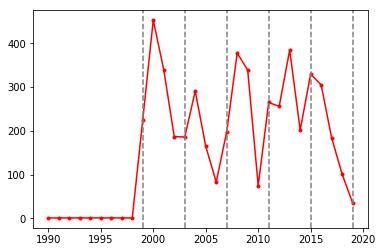

In [263]:
pl.plot(anos, nCargosByAno,'r-')
pl.plot(anos, nCargosByAno,'r.')
pl.axvline(2019,color='gray',linestyle='--')
pl.axvline(2015,color='gray',linestyle='--')
pl.axvline(2011,color='gray',linestyle='--')
pl.axvline(2007,color='gray',linestyle='--')
pl.axvline(2003,color='gray',linestyle='--')
pl.axvline(1999,color='gray',linestyle='--')
pl.show()

In [264]:
def nOrgaosPreenchidos(ano):
    return len(activeInPeriod(rorgaos.loc[rorgaos.titulo!='Suplente'], 
                              str(ano)+'-02-01', str(ano)+'-04-18')[['id_deputado','siglaOrgao']])

In [265]:
anos         = np.arange(1990,2020)
nOrgaosByAno = np.array([nOrgaosPreenchidos(a) for a in anos])

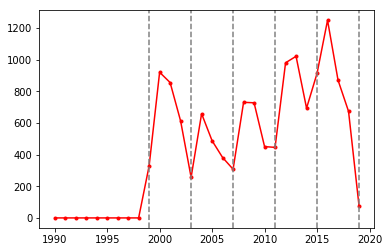

In [266]:
pl.plot(anos, nOrgaosByAno,'r-')
pl.plot(anos, nOrgaosByAno,'r.')
pl.axvline(2019,color='gray',linestyle='--')
pl.axvline(2015,color='gray',linestyle='--')
pl.axvline(2011,color='gray',linestyle='--')
pl.axvline(2007,color='gray',linestyle='--')
pl.axvline(2003,color='gray',linestyle='--')
pl.axvline(1999,color='gray',linestyle='--')
pl.show()